In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# grhpviz
from sklearn.tree import export_graphviz

import graphviz

# 기계 학습 모델 필요 모듈
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 구성

In [2]:
df_raw = pd.read_csv("Data/HMEQ.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [3]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
## 범주형 변수
df_raw["JOB"].fillna("Other", inplace=True)

## 연속형 변수
# 결측치 있는 모든 열을 평균으로 대체
df_raw.fillna(df_raw.mean(), inplace =True)

In [5]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### 더미변수 생성

In [6]:
# REASON과 JOB데이터의 더미변수 생성

df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD", axis=1, inplace = False)

### 데이터 분할

In [8]:
# train_test_split (7:3으로 트레인과 테스트 데이터가 나눠진다.)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.3, random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (2623, 18)
train data Y size: (2623,)
test data X size: (1125, 18)
test data Y size: (1125,)


# 2. 모델 생성

In [9]:
svm_uncustomized = KNeighborsClassifier()
svm_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.916
Accuracy on test set: 0.908


- train/test데이터가 서로 유사해보이지만 다소 과소적합상태라고 볼 수 있다.

### 스케일링

In [10]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [11]:
### 스케일링 데이터 분할
df_scaled_train_x, df_scaled_test_x= train_test_split(df_scaled, test_size=0.3, random_state=1234)

print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))


train data X size: (2623, 18)
test data X size: (1125, 18)


In [13]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(df_scaled_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(knn_scaled.score(df_scaled_train_x, df_train_y)))

#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(knn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.940
Accuracy on test set: 0.925


- 스케일링한 데이터를 넣어준 것만으로 데이터의 성능이 올라갔다.

### 하이퍼 파라미터 변경

### n_neighbors: 이웃 수 증가

In [21]:
train_accuracy=[]; test_accuracy = []

para_neighbors = [i for i in range(1, 16)] # [0.1 * c for c in range(-2, 2)]

for v_n_neighbors in para_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_neighbors
df_accuracy_neighbors["TrainScore"] = train_accuracy
df_accuracy_neighbors["TestScore"] = test_accuracy

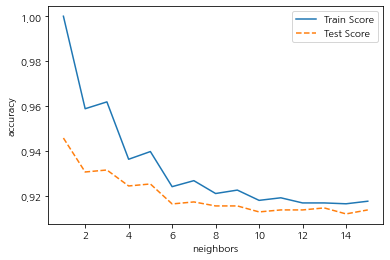

In [18]:
plt.plot(para_neighbors, train_accuracy, linestyle="-", label = "Train Score")
plt.plot(para_neighbors, test_accuracy, linestyle="--", label = "Test Score")
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.legend()

In [19]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.946
1,2,0.959,0.931
2,3,0.962,0.932
3,4,0.936,0.924
4,5,0.940,0.925
5,6,0.924,0.916
6,7,0.927,0.917
7,8,0.921,0.916
8,9,0.923,0.916
9,10,0.918,0.913


※ test데이터와 train데이터의 격차가 가장 적어보이는 N=4로 지정

### weights: 가중치별 이웃 수 증가에 따른 정확도 변화

In [32]:
para_weights = (["uniform"]*10) + (["distance"]*10)
para_weights

['uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance']

In [37]:
train_accuracy=[]; test_accuracy = []

para_neighbors = [i for i in range(1, 11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"])*10 + (["distance"])*10

for (v_n_neighbors, v_weights) in zip(para_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

In [38]:
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.946
1,2,uniform,0.959,0.931
2,3,uniform,0.962,0.932
3,4,uniform,0.936,0.924
4,5,uniform,0.940,0.925
5,6,uniform,0.924,0.916
6,7,uniform,0.927,0.917
7,8,uniform,0.921,0.916
8,9,uniform,0.923,0.916
9,10,uniform,0.918,0.913


In [39]:
# 그림을 그리기 위해 데이터 형태 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index="Neighbors", columns="Weights",
                                                     values=["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.945778  0.945778
2                   1.0  0.958826     0.945778  0.930667
3                   1.0  0.961876     0.940444  0.931556
4                   1.0  0.936332     0.938667  0.924444
5                   1.0  0.939764     0.934222  0.925333
6                   1.0  0.924133     0.932444  0.916444
7                   1.0  0.926801     0.928889  0.917333
8                   1.0  0.921083     0.927111  0.915556
9                   1.0  0.922608     0.923556  0.915556
10                  1.0  0.918033     0.924444  0.912889

In [40]:
# pivot을 이용할 경우, columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.945778,0.945778
2,1.0,0.958826,0.945778,0.930667
3,1.0,0.961876,0.940444,0.931556
4,1.0,0.936332,0.938667,0.924444
5,1.0,0.939764,0.934222,0.925333


<AxesSubplot:xlabel='Neighbors'>

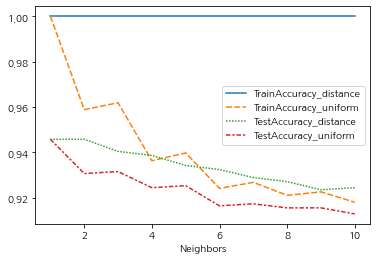

In [41]:
sns.lineplot(data=df_accuracy_weights_pivot)

- 점수가 제일 좋아보이는 uniform 방법 사용

### para_metric: 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [44]:
train_accuracy=[]; test_accuracy = []

para_neighbors = [i for i in range(1, 11)]*3 # [0.1 * c for c in range(-2, 2)]
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"] * 10
for v_n_neighbors, v_metric in zip(para_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.946
1,2,minkowski,0.959,0.931
2,3,minkowski,0.962,0.932
3,4,minkowski,0.936,0.924
4,5,minkowski,0.940,0.925
5,6,minkowski,0.924,0.916
6,7,minkowski,0.927,0.917
7,8,minkowski,0.921,0.916
8,9,minkowski,0.923,0.916
9,10,minkowski,0.918,0.913


In [50]:
# 그림을 그리기 위해 데이터 형태 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors", columns="Metric",
                                                     values=["TrainAccuracy", "TestAccuracy"])

# pivot을 이용할 경우, columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.945778,0.945778,0.945778
2,0.958826,0.951963,0.958826,0.930667,0.922667,0.930667
3,0.961876,0.957682,0.961876,0.931556,0.927111,0.931556
4,0.936332,0.930995,0.936332,0.924444,0.915556,0.924444
5,0.939764,0.933283,0.939764,0.925333,0.919111,0.925333


<AxesSubplot:xlabel='Neighbors'>

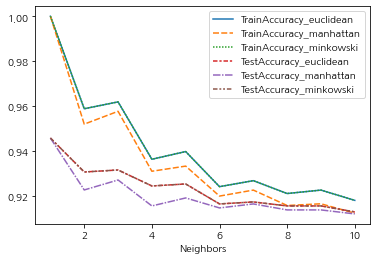

In [51]:
sns.lineplot(data=df_accuracy_metric_pivot)

- 정확도가 제일 높은 euclidean을 사용하도록 함,

## 결론 도출

In [46]:
### 최종 모델 선정

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=4, metric="euclidean", weights="uniform")
knn_model.fit(df_scaled_train_x, df_train_y)

y_pred = knn_model.predict(df_scaled_test_x)

# Train 데이터 설명력
print("Accuracy on training set: {:.3f}".format(knn_model.score(df_scaled_train_x, df_train_y)))
#test데이터 설명력
print("Accuracy on test set: {:.3f}".format(knn_model.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


Accuracy on training set: 0.936
Accuracy on test set: 0.924
Comfusion Matrix: 
[[1021    0]
 [  85   19]]


- 스케일링한 데이터보다 트레이닝 데이터의 과적합이 줄어 안정성이 늘어난 것으로 보인다.

### 추가로 그리드 서치 가능